In [1]:
import pandas as pd
import numpy as np

In [48]:
main = pd.read_csv('/Users/hayoun/Desktop/K-DS/minute_data_preprocessed/main_minute_ordered.csv', index_col = 0)
main

,date,conference_number,meeting_name,question_number,main_committee,sub_committee,committee_name,meeting_number,session_number,agenda,law,qna_type,context,context_learn,questioner_ID,answerer_ID,answer.comment,answer.keyword
id,,,,,,,,,,,,,,,,,,
44921,2015-02-25,44921,본회의,1,국회본회의,NaN,국회본회의,제331회,제5차,1. 정치․외교․통일․안보에 관한 질문,NaN,추출형,존경하는 국민 여러분! 이석현 국회부의장과 선배ㆍ동료 의원 여러분! 신임 이완구...,박종철 고문치사 사건에 대한 검찰의 행위에 관련하여 검찰이 고문을 축소하거나 은폐한...,4984,,제가 알기로는 그런 일이 전혀 없고 이런 과정들은 그 당시에 진행했던 국정조사에서도...,"국정조사, 검찰"
44926,2015-02-26,44926,본회의,1,국회본회의,NaN,국회본회의,제331회,제6차,3. 경제에 관한 질문,NaN,추출형,"존경하는 이석현 부의장님, 선배ㆍ동료 의원 여러분! 이완구 총리를 비롯한 국무위원...",R&D 예산이 증가하고 연구개발 (R&D) 사업의 성공률이 높지만 사업화 비율이 낮...,3136,,사실 정부가 지금까지 R&D 예산 투자를 계속 지속적으로 늘려 왔는데 이것이 사업화...,"R&D, 부족, 정부, 예산, 투자, 지속, 사업화, 실용화"
45057,2015-04-14,45057,본회의,1,국회본회의,NaN,국회본회의,제332회,제5차,1. 외교․통일․안보에 관한 질문,NaN,추출형,"존경하는 국민 여러분! 국회의장님, 선배ㆍ동료 의원님! 국무총리를 비롯한 국무위...",총리의 질문에 대해 북한 핵 미사일 대응전략은 다양한 수단을 활용하여 핵 미사일 위...,2721,,북한의 핵 미사일에 대한 기본전략은 한미연합방위체제하에서 맞춤형 억제전략이고 그것을...,"북한, 핵, 미사일, 기본전략, 한미연합방위체제, 맞춤형, 억제전략, 구체화, 동맹"
45062,2015-04-15,45062,본회의,1,국회본회의,NaN,국회본회의,제332회,제6차,1. 경제에 관한 질문,NaN,추출형,"존경하는 정의화 의장님, 그리고 선배ㆍ동료 의원 여러분! 경북 구미을 출신 김태환...","농업정책자금 금리를 인하하려는 주된 이유는 농업 분야에 대한 투자를 촉진하고, 농업...",1656,,"예, 그렇습니다. 전체적으로 3%로 되어 있는 것은 아니고요, 농업정책자금이 대략 ...","투자, 농업정책자금, 금리, 작동, 분야, 전체"
45101,2015-04-16,45101,본회의,1,국회본회의,NaN,국회본회의,제332회,제7차,1. 교육․사회․문화에 관한 질문(계속),NaN,추출형,존경하는 국민 여러분! 그리고 정갑윤 국회부의장과 선배ㆍ동료 의원 여러분! 그리...,최근 국민안전처는 안전혁신 마스터플랜과 국가재난안전통신망 구축 등을 위해 30조 원...,3411,,지금 여러 가지 대책을 수립하고 있고 또 국민 동참하에 현재는 국가안전대진단을 실시...,"대책, 수립, 국민, 동참, 국가안전대진단, 실시"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52147,2022-09-21,52147,본회의,19,국회본회의,NaN,국회본회의,제400회,제5차,1. 경제에 관한 질문,경제에 관한 질문,추출형,존경하는 국민 여러분! 김영주 부의장님과 선배․동료 의원 여러분! 경남 거제 출...,"거제시의 높은 출산율에 대해, 조선업이 호황을 맞았을 때 경제적인 안정과 일자리 창...",7478,,"이런 정책은 결국 어떤 환경에, 우리 노동자들이 일하는 환경에 직면하느냐 하는 게 ...","노동자, 노동시장, 하이테크, 4차 산업혁명"
52147,2022-09-21,52147,본회의,20,국회본회의,NaN,국회본회의,제400회,제5차,1. 경제에 관한 질문,경제에 관한 질문,추출형,존경하는 국민 여러분! 김영주 부의장님과 선배․동료 의원 여러분! 경남 거제 출...,"거제시의 높은 출산율에 대해, 조선업이 호황을 맞았을 때 경제적인 안정과 일자리 창...",7478,,그 기간이 아마 조선업이 가장 호황일 때였다고 생각이 듭니다. 역시 전체적으로 생활...,"조선업, 호황, 출산율"
52147,2022-09-21,52147,본회의,21,국회본회의,NaN,국회본회의,제400회,제5차,1. 경제에 관한 질문,경제에 관한 질문,추출형,그런 유료도로 중에 지자체가 관리하는 유료도로 혹시 몇 % 정도 되는지 아십니까? ...,전국 민자 유료도로의 문제점을 분석하고 대처 방안을 마련하는 것은 중요한 과제입니다...,7478,,저희들이 말씀드린 것처럼 운영기간을 길게 사업을 재구조화해서 통행료를 낮출 수 있는...,"운영기간, 재구조화, 통행료, 자금 재조달, 국고 지원"


In [2]:
parliament_wrap = pd.read_csv('/Users/hayoun/Desktop/K-DS/minute_data_preprocessed/all_minute_wrapped.csv', index_col = 0)
sub_wrap = pd.read_csv('/Users/hayoun/Desktop/K-DS/minute_data_preprocessed/sub_minute_wrapped.csv', index_col = 0)
law_df = pd.read_csv('/Users/hayoun/Desktop/K-DS/rawdata/law_train_filtered.csv', index_col = 0) # 임기만료 폐기 제외; 날짜 범위: 2015-01-12 00:00:00 ~ 2023-07-27 00:00:00

In [52]:
sub_wrap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3783 entries, 44851 to 52664
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3783 non-null   datetime64[ns]
 1   meeting_name    3783 non-null   object        
 2   main_committee  3783 non-null   object        
 3   agenda          3783 non-null   object        
 4   agenda_index    3783 non-null   object        
 5   context_full    3783 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 206.9+ KB


In [4]:
law_df = law_df.sort_values(by = ['title', 'date'])
law_df

,id,bill_id,title,committee,field,enactment,amendment,proposer,advisor,date,session,paragraph,ext_summary,gen_summary,terminology,disposal
25619,1040_1594,PRC_M2K0C0Y7W0V7R1Q4Z4L3M0T8A9S4H5,119구조·구급에 관한 법률 일부개정법률안(김승수의원 등 14인),행정안전위원회,119구조·구급에 관한 법률,N,Y,김승수의원 등 14인,장지원,2020-09-24,21,개정안은 구급차의 이송을 방해하는 행위를 금지하고 이를 위반한 자를 5년 이하의 징...,개정안은 구급차의 이송을 방해하는 행위를 금지하고 이를 위반한 자를 5년 이하의 징...,구급차의 이송을 방해하는 행위를 금지하고 이를 위반한 자를 5년 이하의 징역 또는 ...,"소방청, 119구조·구급에 관한 법률, 응급의료에 관한 법률, 응급의료에 관한 법률...",대안반영폐기
19404,1040_1648,PRC_X2G0B0M7K0W1Y1Y1S2Y1Y2B0T4O5X1,119구조·구급에 관한 법률 일부개정법률안(박덕흠의원 등 12인),행정안전위원회,119구조·구급에 관한 법률,N,Y,박덕흠의원 등 12인,장지원,2020-09-24,21,개정안은 구급차의 이송을 방해하는 행위를 금지하고 이를 위반한 자를 5년 이하의 징...,현행「119구조·구급에 관한 법률」제13조제2항은 누구든지 구조·구급대의 구조·구급...,현행 「119구조·구급에 관한 법률」제13조제2항은 누구든지 구조·구급대의 구조·구...,"119구조·구급에 관한 법률, 응급의료에 관한 법률, 보건복지위원회, 소방청",대안반영폐기
23080,1040_1648,PRC_X2G0B0M7K0W1Y1Y1S2Y1Y2B0T4O5X1,119구조·구급에 관한 법률 일부개정법률안(박덕흠의원 등 12인),행정안전위원회,119구조·구급에 관한 법률,N,Y,박덕흠의원 등 12인,장지원,2020-09-24,21,개정안은 위급상황을 소방기관 또는 관계 행정기관에 거짓으로 알리는 행위에 대한 벌칙...,개정안은 위급상황을 소방기관 또는 관계 행정기관에 거짓으로 알리는 행위에 대한 벌칙...,현행 「119구조·구급에 관한 법률」제4조제3항은 누구든지 위급상황에 처한 요구조자...,"119구조·구급에 관한 법률, 소방기본법, 소방청",대안반영폐기
18561,1040_924,PRC_O2R0O0B8L3J1D1V1T5T1X5T5X1U6O4,119구조·구급에 관한 법률 일부개정법률안(박완주의원 등 19인),행정안전위원회,119구조·구급에 관한 법률,N,Y,박완주의원 등 19인,장지원,2020-12-09,21,개정안은 누구든지 구조·구급활동 중인 구조·구급대원을 모욕하지 않도록 하고 이를 위...,개정안은 누구든지 구조·구급활동 중인 구조·구급대원을 모욕하지 않도록 하고 이를 위...,개정안은 누구든지 구조·구급활동 중인 구조·구급대원을 모욕하지 않게 하고 이를 어길...,"형법, 벌금, 징역, 특수공무집행방해치사상죄",대안반영폐기
21562,1040_924,PRC_O2R0O0B8L3J1D1V1T5T1X5T5X1U6O4,119구조·구급에 관한 법률 일부개정법률안(박완주의원 등 19인),행정안전위원회,119구조·구급에 관한 법률,N,Y,박완주의원 등 19인,장지원,2020-12-09,21,개정안은 소방헬기 등을 전문적으로 통합정비 및 관리하기 위하여 소방청에 119항공정...,이에 개정안은 소방헬기 등을 전문적으로 통합정비 및 관리하기 위하여 소방청에 119...,개정안은 소방헬기 등을 전문적으로 통합정비 및 관리하고자 소방청에 119항공정비실을...,"소방청, 소방청과 그 소속기관 직제",대안반영폐기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29590,1039_10822,PRC_X1M6A0C8Y2S9K1I9G2R1H5Y3G0O6T9,후천성면역결핍증 예방법 일부개정법률안(최도자의원 등 10인),보건복지위원회,법정형 정비 관련 법률,N,Y,최도자의원 등 10인,김승기,2017-03-30,20,"□ 보건복지부(30건)와 식품의약품안전처(1건, 의료기기법) 모두 벌금형의 금액을 ...","보건복지부(30건)와 식품의약품안전처(1건, 의료기기법) 모두 벌금형의 금액을 징역...","보건복지부(30건)와 식품의약품안전처(1건, 의료기기법) 모두 벌금형의 금액을 징역...","보건복지부, 식품의약품안전처, 의료기기법, 법정형 조문 정비, 노인복지법, 징역형,...",수정가결
9356,1040_9254,ARC_V1Z4Y1O2J2S9J1K7A0I4N0O3Q8E3L0,휴면예금관리재단의 설립 등에 관한 법률 전부개정법률안,정무위원회,휴면예금관리재단의 설립 등에 관한 법률,N,Y,정부,진정구,2016-03-03,19,개정안은 서민금융 지원 강화를 위하여 휴면예금관리재단(=미소금융중앙재단)뿐만 아니라...,개정안은 서민금융 지원 강화를 위하여 휴면예금관리재단(=미소금융중앙재단)뿐만 아니라...,개정안은 서민금융 지원 강화를 위하여 신용회복위원회 및 서민금융진흥원의 서민금융 지...,"신용회복위원회, 서민금융진흥원, 서민의 금융생활 지원에 관한 법률",대안반영폐기
34169,1040_723,PRC_Q2R0D0P9Z1H5V1O3U0N8M3P9B9S1G8,희귀질환관리법 일부개정법률안(강훈식의원 등 11인),보건복지위원회,희귀질환관리법,N,Y,강훈식의원 등 11인,신항진,2023-05-25,21,1) 희귀질환 극복의 날 변경\r\n□ 현행 법 제4조는 매년 5월 23일을 희귀질...,개정안은 현행법이 정하고 있는 매년 5월 23일은 한국희귀난치성질환연합회의 창립일에...,개정안은 4년에 한번씩 2월의 마지막 날이 29일로 끝나는 희귀성에서 착안하여 전세...,"희귀성, 세계 희귀질환의 날, 희귀질환관리, 한국희귀난치성질환연합회",대안반영폐기
34687,1040_723,PRC_Q2R0D0P9Z1H5V1O3U0N8M3P9B9S1G8,희귀질환관리법 일부개정법률안(강훈식의원 등 11인),보건복지위원회,희귀질환관리법,N,Y,강훈식의원 등 11인,신항진,2023-05-25,21,2) 희귀질환 지정 신청\r\n□ 현행 법 제2조에 따르면 희귀질환이란 ‘유병(有病...,이에 개정안은 희귀질환으로 지정되지 않은 질환에 대하여 희귀질환 지정을 신청하고자 ...,개정안은 희귀질환 지정을 신청하고자 하는 자는 이를 지정하여 줄 것을 보건복지부장관...,"희귀질환, 보건복지부장관, 대통령령, 질병관리청장, 보건복지부령",대안반영폐기


In [7]:
law_df['date'] = pd.to_datetime(law_df['date'], format='%Y-%m-%d')
parliament_wrap['date'] = pd.to_datetime(parliament_wrap['date'], format='%Y-%m-%d')
sub_wrap['date'] = pd.to_datetime(sub_wrap['date'], format='%Y-%m-%d')

In [26]:
# 특정 법안의 bill_id에 따라 30일 내외(혹은 사용자 지정 범위)의 날짜로 필터링한 후, 'committee'가 같은지 확인하는 함수
def get_indices_within_days_by_bill_id(bill_id, law_df, sub_wrapped, days=30):
    # 입력된 bill_id에 해당하는 law_df 행의 'date'와 'committee' 값 가져오기
    law_row = law_df.loc[law_df['bill_id'] == bill_id]
    law_date = law_row['date'].values[0]
    law_committee = law_row['committee'].values[0]
    
    # 'date'가 law_date 기준으로 지정된 범위 내에 있는 행들 필터링
    mask = (sub_wrapped['date'] >= law_date - pd.Timedelta(days=days)) & (sub_wrapped['date'] <= law_date + pd.Timedelta(days=days))
    sub_filtered = sub_wrapped[mask]
    
    # 필터링된 행 중에서 'committee'가 같은 행을 다시 필터링
    sub_committee_filtered = sub_filtered[sub_filtered['main_committee'] == law_committee]
    
    # 'committee'가 같은 데이터가 없으면 메시지를 출력하고 날짜 범위에 해당하는 행만 반환
    if sub_committee_filtered.empty:
        # print(f"담당 위원회에서 전후 {days}일 안에 논의된 기록이 없습니다.")
        return sub_filtered.index.tolist(), sub_filtered
    else:
        return sub_committee_filtered.index.tolist(), sub_committee_filtered

# 사용 예시:
# bill_id = 'want_to_find'  # 확인하고 싶은 bill_id
# indices, matching_rows = get_indices_within_days_by_bill_id(bill_id, law_df, sub_wrapped)

# 일치하는 행들을 출력
# print(matching_rows)

## 최종 데이터프레임 만들기

bill_id | date | id | title | directly_related | related_agenda_index | unique_agendas

In [27]:
import pandas as pd

def create_law_parliament_df(law_df, parliament_wrap, days=30):
    # 결과를 저장할 리스트
    result = []
    
    # 각 법안(bill_id)에 대해 처리
    for _, row in law_df.iterrows():
        bill_id = row['bill_id']
        date = row['date']
        title = row['title']
        committee = row['committee']
        
        # get_indices_within_days_by_bill_id 함수로 관련된 국회회의록 불러오기
        indices, matching_rows = get_indices_within_days_by_bill_id(bill_id, law_df, parliament_wrap, days=days)
        
        if not matching_rows.empty:
            # 관련된 agenda_index들을 리스트로 저장
            related_agenda_index = matching_rows['agenda_index'].tolist()
            
            # unique한 agenda명들을 저장
            unique_agendas = matching_rows['agenda'].unique().tolist()
            
            # directly_related 여부 확인 (committee가 같은 경우)
            if 'main_committee' in matching_rows.columns and any(matching_rows['main_committee'] == row['committee']):
                directly_related = 1
            else:
                directly_related = 0
        
            # 결과 리스트에 추가
            result.append({
                'bill_id': bill_id,
                'date': date,
                'id': row['id'],
                'title': title,
                'directly_related': directly_related,
                'related_agenda_index': related_agenda_index,
                'unique_agendas': unique_agendas
            })
        else:
            # 연관된 회의록이 없는 경우 처리
            result.append({
                'bill_id': bill_id,
                'date': date,
                'id': row['id'],
                'title': title,
                'directly_related': 0,
                'related_agenda_index': [],
                'unique_agendas': []
            })
    
    # 결과를 데이터프레임으로 변환
    result_df = pd.DataFrame(result)
    return result_df

In [18]:
parliament_wrap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 44851 to 52664
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3961 non-null   datetime64[ns]
 1   meeting_name    3961 non-null   object        
 2   main_committee  3961 non-null   object        
 3   agenda          3961 non-null   object        
 4   agenda_index    3961 non-null   object        
 5   context_full    3961 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 216.6+ KB


In [12]:
pip install -- 

  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
from tqdm import tqdm

In [28]:
import pandas as pd
from tqdm import tqdm

# tqdm를 적용한 래퍼 함수
def create_law_parliament_df_with_progress(law_df, parliament_wrap, days=30):
    # 결과를 저장할 리스트
    result = []
    
    # tqdm을 사용하여 진행 상황 표시
    for _, row in tqdm(law_df.iterrows(), total=len(law_df), desc="Processing Law-Parliament Data"):
        bill_id = row['bill_id']
        date = row['date']
        title = row['title']
        committee = row['committee']
        
        # get_indices_within_days_by_bill_id 함수로 관련된 국회회의록 불러오기
        indices, matching_rows = get_indices_within_days_by_bill_id(bill_id, law_df, parliament_wrap, days=days)
        
        if not matching_rows.empty:
            # 관련된 agenda_index들을 리스트로 저장
            related_agenda_index = matching_rows['agenda_index'].tolist()
            
            # unique한 agenda명들을 저장
            unique_agendas = matching_rows['agenda'].unique().tolist()
            
            # directly_related 여부 확인 (committee가 같은 경우)
            if 'main_committee' in matching_rows.columns and any(matching_rows['main_committee'] == committee):
                directly_related = 1
            else:
                directly_related = 0
            
            # 결과 리스트에 추가
            result.append({
                'bill_id': bill_id,
                'date': date,
                'id': row['id'],
                'title': title,
                'directly_related': directly_related,
                'related_agenda_index': related_agenda_index,
                'unique_agendas': unique_agendas
            })
        else:
            # 연관된 회의록이 없는 경우 처리
            result.append({
                'bill_id': bill_id,
                'date': date,
                'id': row['id'],
                'title': title,
                'directly_related': 0,
                'related_agenda_index': [],
                'unique_agendas': []
            })
    
    # 결과를 데이터프레임으로 변환
    result_df = pd.DataFrame(result)
    return result_df

In [29]:
# 사용 예시:
law_parliament_df = create_law_parliament_df_with_progress(law_df, parliament_wrap, days=30)

# 결과 확인
law_parliament_df

Processing Law-Parliament Data: 100%|██████████| 16240/16240 [00:18<00:00, 881.18it/s]


,bill_id,date,id,title,directly_related,related_agenda_index,unique_agendas
0,PRC_M2K0C0Y7W0V7R1Q4Z4L3M0T8A9S4H5,2020-09-24,1040_1594,119구조·구급에 관한 법률 일부개정법률안(김승수의원 등 14인),1,"[50222-1, 50468-1, 50470-1, 50522-1, 50576-1, ...","[2. 자연재해대책법 일부개정법률안(정부 제출), 감사개시]"
1,PRC_X2G0B0M7K0W1Y1Y1S2Y1Y2B0T4O5X1,2020-09-24,1040_1648,119구조·구급에 관한 법률 일부개정법률안(박덕흠의원 등 12인),1,"[50222-1, 50468-1, 50470-1, 50522-1, 50576-1, ...","[2. 자연재해대책법 일부개정법률안(정부 제출), 감사개시]"
2,PRC_X2G0B0M7K0W1Y1Y1S2Y1Y2B0T4O5X1,2020-09-24,1040_1648,119구조·구급에 관한 법률 일부개정법률안(박덕흠의원 등 12인),1,"[50222-1, 50468-1, 50470-1, 50522-1, 50576-1, ...","[2. 자연재해대책법 일부개정법률안(정부 제출), 감사개시]"
3,PRC_O2R0O0B8L3J1D1V1T5T1X5T5X1U6O4,2020-12-09,1040_924,119구조·구급에 관한 법률 일부개정법률안(박완주의원 등 19인),1,"[50424-1, 50457-1, 50461-1, 50498-1, 50498-2, ...",[1. 2021년도 예산안(계속)가. 중앙선거관리위원회 소관나. 소방청 소관다. 경...
4,PRC_O2R0O0B8L3J1D1V1T5T1X5T5X1U6O4,2020-12-09,1040_924,119구조·구급에 관한 법률 일부개정법률안(박완주의원 등 19인),1,"[50424-1, 50457-1, 50461-1, 50498-1, 50498-2, ...",[1. 2021년도 예산안(계속)가. 중앙선거관리위원회 소관나. 소방청 소관다. 경...
...,...,...,...,...,...,...,...
16235,PRC_X1M6A0C8Y2S9K1I9G2R1H5Y3G0O6T9,2017-03-30,1039_10822,후천성면역결핍증 예방법 일부개정법률안(최도자의원 등 10인),1,"[47094-1, 47096-1, 47096-2, 47096-3, 47096-4, ...",[1. 국민건강보험법 일부개정법률안(윤소하 의원 대표발의)(의안번호 521)(계속)...
16236,ARC_V1Z4Y1O2J2S9J1K7A0I4N0O3Q8E3L0,2016-03-03,1040_9254,휴면예금관리재단의 설립 등에 관한 법률 전부개정법률안,0,"[46090-1, 46091-1, 46092-1, 46093-1, 46094-1, ...",[1. 군인사법 일부개정법률안(안규백 의원 대표발의) 2. 군인사법 일부개정법률안(...
16237,PRC_Q2R0D0P9Z1H5V1O3U0N8M3P9B9S1G8,2023-05-25,1040_723,희귀질환관리법 일부개정법률안(강훈식의원 등 11인),0,[],[]
16238,PRC_Q2R0D0P9Z1H5V1O3U0N8M3P9B9S1G8,2023-05-25,1040_723,희귀질환관리법 일부개정법률안(강훈식의원 등 11인),0,[],[]


In [49]:
# 사용 예시:
law_sub_parliament_df = create_law_parliament_df_with_progress(law_df, sub_wrap, days=30)

# 결과 확인
law_sub_parliament_df

Processing Law-Parliament Data:   0%|          | 0/16240 [00:00<?, ?it/s]

Processing Law-Parliament Data: 100%|██████████| 16240/16240 [00:18<00:00, 899.16it/s]


,bill_id,date,id,title,directly_related,related_agenda_index,unique_agendas
0,PRC_M2K0C0Y7W0V7R1Q4Z4L3M0T8A9S4H5,2020-09-24,1040_1594,119구조·구급에 관한 법률 일부개정법률안(김승수의원 등 14인),1,"[50222-1, 50468-1, 50470-1, 50522-1, 50576-1, ...","[2. 자연재해대책법 일부개정법률안(정부 제출), 감사개시]"
1,PRC_X2G0B0M7K0W1Y1Y1S2Y1Y2B0T4O5X1,2020-09-24,1040_1648,119구조·구급에 관한 법률 일부개정법률안(박덕흠의원 등 12인),1,"[50222-1, 50468-1, 50470-1, 50522-1, 50576-1, ...","[2. 자연재해대책법 일부개정법률안(정부 제출), 감사개시]"
2,PRC_X2G0B0M7K0W1Y1Y1S2Y1Y2B0T4O5X1,2020-09-24,1040_1648,119구조·구급에 관한 법률 일부개정법률안(박덕흠의원 등 12인),1,"[50222-1, 50468-1, 50470-1, 50522-1, 50576-1, ...","[2. 자연재해대책법 일부개정법률안(정부 제출), 감사개시]"
3,PRC_O2R0O0B8L3J1D1V1T5T1X5T5X1U6O4,2020-12-09,1040_924,119구조·구급에 관한 법률 일부개정법률안(박완주의원 등 19인),1,"[50424-1, 50457-1, 50461-1, 50498-1, 50498-2, ...",[1. 2021년도 예산안(계속)가. 중앙선거관리위원회 소관나. 소방청 소관다. 경...
4,PRC_O2R0O0B8L3J1D1V1T5T1X5T5X1U6O4,2020-12-09,1040_924,119구조·구급에 관한 법률 일부개정법률안(박완주의원 등 19인),1,"[50424-1, 50457-1, 50461-1, 50498-1, 50498-2, ...",[1. 2021년도 예산안(계속)가. 중앙선거관리위원회 소관나. 소방청 소관다. 경...
...,...,...,...,...,...,...,...
16235,PRC_X1M6A0C8Y2S9K1I9G2R1H5Y3G0O6T9,2017-03-30,1039_10822,후천성면역결핍증 예방법 일부개정법률안(최도자의원 등 10인),1,"[47094-1, 47096-1, 47096-2, 47096-3, 47096-4, ...",[1. 국민건강보험법 일부개정법률안(윤소하 의원 대표발의)(의안번호 521)(계속)...
16236,ARC_V1Z4Y1O2J2S9J1K7A0I4N0O3Q8E3L0,2016-03-03,1040_9254,휴면예금관리재단의 설립 등에 관한 법률 전부개정법률안,0,"[46090-1, 46091-1, 46092-1, 46094-1, 46100-1, ...",[1. 군인사법 일부개정법률안(안규백 의원 대표발의) 2. 군인사법 일부개정법률안(...
16237,PRC_Q2R0D0P9Z1H5V1O3U0N8M3P9B9S1G8,2023-05-25,1040_723,희귀질환관리법 일부개정법률안(강훈식의원 등 11인),0,[],[]
16238,PRC_Q2R0D0P9Z1H5V1O3U0N8M3P9B9S1G8,2023-05-25,1040_723,희귀질환관리법 일부개정법률안(강훈식의원 등 11인),0,[],[]


In [53]:
# law_parliament_df[law_parliament_df['directly_related'] == 1].count()

law_sub_parliament_df[law_sub_parliament_df['directly_related'] == 1].count()

bill_id                 13131
date                    13131
id                      13131
title                   13131
directly_related        13131
related_agenda_index    13131
unique_agendas          13131
dtype: int64

In [31]:
law_parliament_df.to_csv('/Users/hayoun/Desktop/K-DS/law_parliament_df.csv', index = False)

In [35]:
# pip install -- matplotlib
!pip install -- seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [38]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the font to a font that supports Korean
plt.rcParams['font.family'] = 'AppleGothic'  # or 'Malgun Gothic' if that's installed

# Optionally, resolve the minus sign issue
# plt.rcParams['axes.unicode_minus'] = False

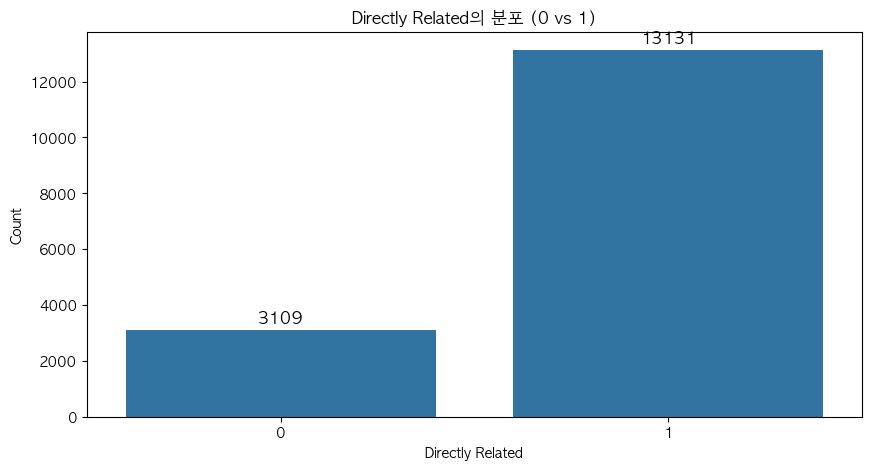

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# directly_related의 분포를 시각화하고 개수 표시
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='directly_related', data=law_parliament_df)
plt.title('Directly Related의 분포 (0 vs 1)')
plt.xlabel('Directly Related')
plt.ylabel('Count')

# 각 막대 위에 개수를 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

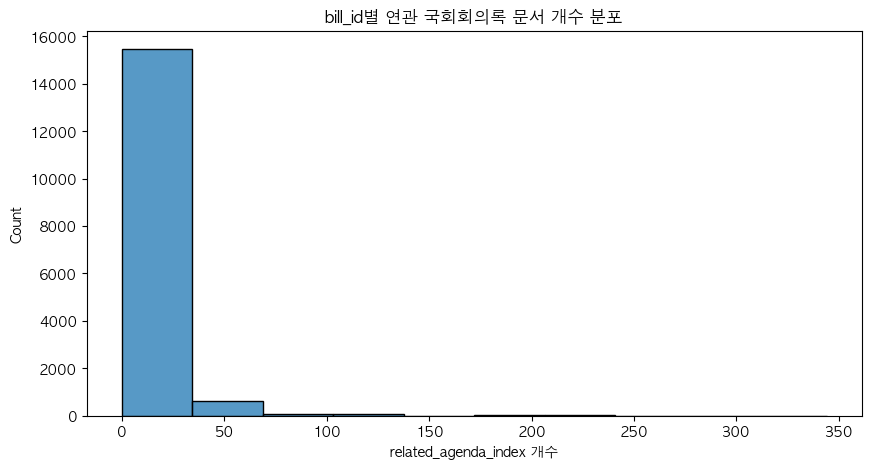

In [42]:
# related_agenda_index의 개수를 시각화
# related_agenda_index의 길이를 계산
law_parliament_df['agenda_count'] = law_parliament_df['related_agenda_index'].apply(len)

# related_agenda_index의 개수 분포 시각화 (directly_related는 제외)
plt.figure(figsize=(10, 5))
sns.histplot(law_parliament_df['agenda_count'], bins=10, kde=False)
plt.title('bill_id별 연관 국회회의록 문서 개수 분포')
plt.xlabel('related_agenda_index 개수')
plt.ylabel('Count')
plt.show()

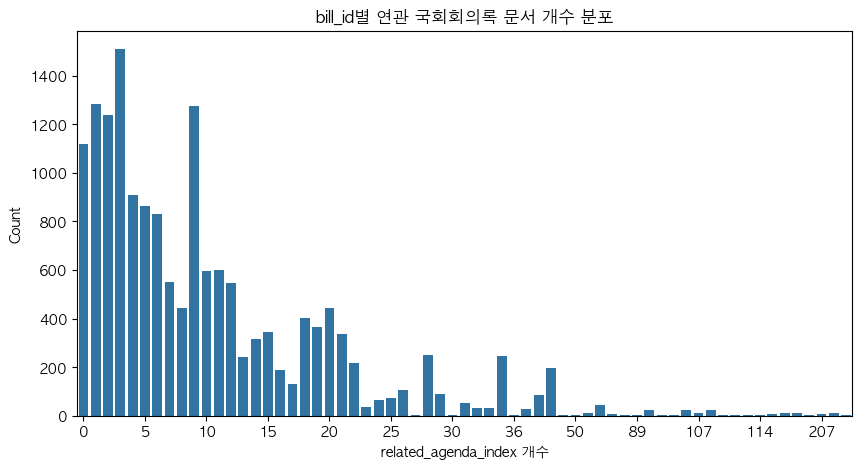

In [47]:
# 막대그래프 시각화
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='agenda_count', data=law_parliament_df)

# x축 레이블을 5단위로 표시
ax.set_xticks(ax.get_xticks()[::5])

plt.title('bill_id별 연관 국회회의록 문서 개수 분포')
plt.xlabel('related_agenda_index 개수')
plt.ylabel('Count')
plt.show()

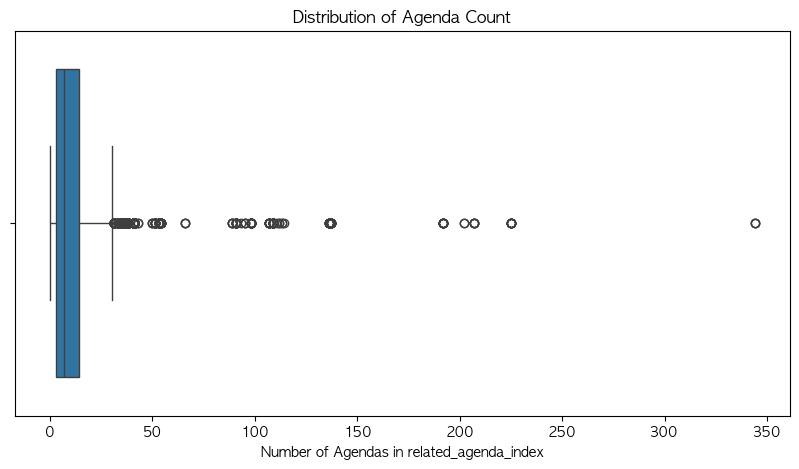

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스 플롯 시각화
plt.figure(figsize=(10, 5))
sns.boxplot(x='agenda_count', data=law_parliament_df)
plt.title('Distribution of Agenda Count')
plt.xlabel('Number of Agendas in related_agenda_index')
plt.show()
